In [4]:
!unzip /content/heart+disease.zip -d /content/

unzip:  cannot find or open /content/heart+disease.zip, /content/heart+disease.zip.zip or /content/heart+disease.zip.ZIP.


In [5]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]

In [6]:
df = pd.read_csv(url, names=columns, na_values="?")

print("Jumlah baris & kolom:", df.shape)
print(df.head())


Jumlah baris & kolom: (303, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [7]:
#@title How would we evaluate success?

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

df = pd.read_csv(url, names=columns)

df = df.replace("?", pd.NA)
df = df.dropna()

for col in df.columns:
    df[col] = pd.to_numeric(df[col])

df["target_binary"] = df["target"].apply(lambda x: 0 if x == 0 else 1)

X = df.drop(["target", "target_binary"], axis=1)
y = df["target_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.8444444444444444
Precision: 0.868421052631579
Recall   : 0.7857142857142857
F1-score : 0.825
ROC-AUC  : 0.8407738095238095

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.87      0.79      0.82        42

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



In [8]:
import pandas as pd

features = df.columns[:-1]
print("Daftar fitur (X):")
for i, feature in enumerate(features, start=1):
    print(f"{i}. {feature}")


Daftar fitur (X):
1. age
2. sex
3. cp
4. trestbps
5. chol
6. fbs
7. restecg
8. thalach
9. exang
10. oldpeak
11. slope
12. ca
13. thal
14. target


In [9]:
#@title Berapa banyak dimensi atau atributnya? (𝐷 = ?)
df = pd.read_csv(url, names=columns)

D = df.shape[1] - 1
print("Jumlah dimensi / atribut (D) =", D)


Jumlah dimensi / atribut (D) = 13


In [10]:
#@title Bagaimana distribusi labelnya?
df["target_binary"] = df["target"].apply(lambda x: 0 if x == 0 else 1)

# Hitung distribusi label
distribusi = df["target_binary"].value_counts()
print("Distribusi label (0=Sehat, 1=Sakit):")
print(distribusi)


Distribusi label (0=Sehat, 1=Sakit):
target_binary
0    164
1    139
Name: count, dtype: int64


In [11]:
#@title apakah semuanya berupa data numerik?

df = df.replace("?", pd.NA)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("Tipe data masing-masing kolom:")
print(df.dtypes)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Kolom numerik:", numeric_cols)
print("Kolom kategorikal:", categorical_cols)



Tipe data masing-masing kolom:
age              float64
sex              float64
cp               float64
trestbps         float64
chol             float64
fbs              float64
restecg          float64
thalach          float64
exang            float64
oldpeak          float64
slope            float64
ca               float64
thal             float64
target             int64
target_binary      int64
dtype: object
Kolom numerik: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'target_binary']
Kolom kategorikal: []


In [12]:
#@title Apakah ada nilai yang hilang (missing values)?
# Mengecek jumlah missing values per kolom
missing_per_kolom = df.isnull().sum()
print("Missing values per kolom:")
print(missing_per_kolom)

# Total missing values di seluruh dataset
total_missing = df.isnull().sum().sum()
print("\nTotal missing values di seluruh dataset:", total_missing)

Missing values per kolom:
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
target           0
target_binary    0
dtype: int64

Total missing values di seluruh dataset: 6


In [13]:
#@title Apa saja labelnya (apakah ada label)?
# Menampilkan semua kolom
print("Kolom-kolom pada dataset:")
print(df.columns)

# Misalkan label bernama 'target' (ganti jika berbeda)
label = "target"

# Mengecek distribusi nilai label
if label in df.columns:
    distribusi_label = df[label].value_counts()
    print(f"\nDistribusi nilai label '{label}':")
    print(distribusi_label)
else:
    print(f"\nLabel '{label}' tidak ditemukan pada dataset.")

Kolom-kolom pada dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'target_binary'],
      dtype='object')

Distribusi nilai label 'target':
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


Distribusi nilai label 'target':
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


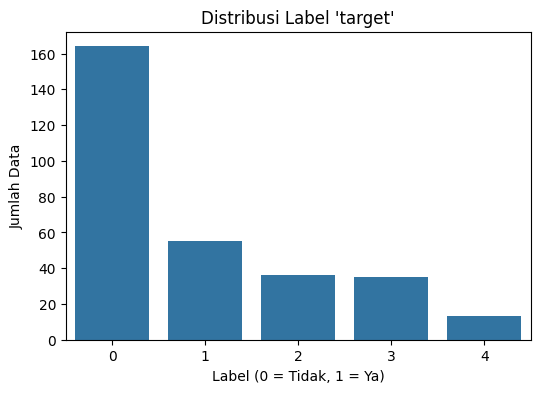

In [14]:
#@title Apakah label tersebut bersifat diskrit?
import matplotlib.pyplot as plt
import seaborn as sns

# Nama kolom label
label = "target"

# Mengecek distribusi nilai label (diskrit)
if label in df.columns:
    distribusi_label = df[label].value_counts()
    print(f"Distribusi nilai label '{label}':")
    print(distribusi_label)

    # Visualisasi distribusi label
    plt.figure(figsize=(6,4))
    sns.countplot(x=label, data=df)
    plt.title(f"Distribusi Label '{label}'")
    plt.xlabel("Label (0 = Tidak, 1 = Ya)")
    plt.ylabel("Jumlah Data")
    plt.show()
else:
    print(f"Label '{label}' tidak ditemukan pada dataset.")


Distribusi label (jumlah dan persentase):
0: 164 data (~54.1%)
1: 55 data (~18.2%)
2: 36 data (~11.9%)
3: 35 data (~11.6%)
4: 13 data (~4.3%)


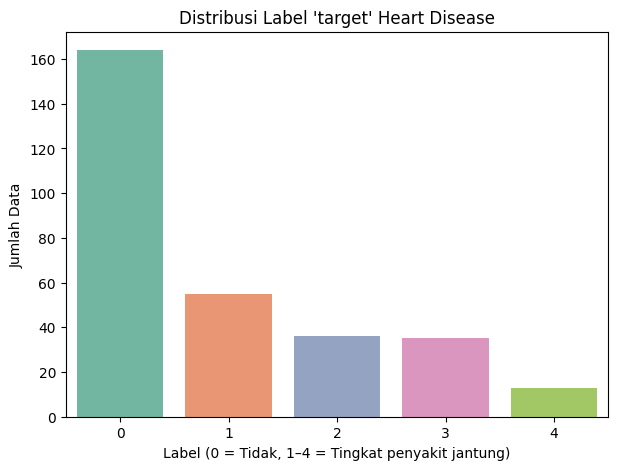

In [15]:
#@title Bagaimana distribusi labelnya?
# Mengecek distribusi nilai label
distribusi_label = df[label].value_counts().sort_index()
persentase_label = distribusi_label / len(df) * 100

print("Distribusi label (jumlah dan persentase):")
for l, count in distribusi_label.items():
    print(f"{l}: {count} data (~{persentase_label[l]:.1f}%)")

# Visualisasi distribusi label
plt.figure(figsize=(7,5))
sns.barplot(x=distribusi_label.index, y=distribusi_label.values, palette="Set2", hue=distribusi_label.index, legend=False)
plt.title("Distribusi Label 'target' Heart Disease")
plt.xlabel("Label (0 = Tidak, 1–4 = Tingkat penyakit jantung)")
plt.ylabel("Jumlah Data")
plt.show()

In [16]:
#@title Apakah ada label yang hilang atau kesalahan pada label?
# 1. Mengecek missing values pada label
missing_label = df[label].isnull().sum()
print(f"Jumlah nilai hilang pada label '{label}': {missing_label}")

# 2. Mengecek nilai unik yang ada pada label
nilai_unik = df[label].unique()
print(f"Nilai unik pada label '{label}': {nilai_unik}")

# 3. Mengecek apakah ada label di luar range yang valid (0-4)
valid_labels = [0,1,2,3,4]
invalid_labels = [x for x in nilai_unik if x not in valid_labels]
print(f"Label yang tidak valid: {invalid_labels}")

Jumlah nilai hilang pada label 'target': 0
Nilai unik pada label 'target': [0 2 1 3 4]
Label yang tidak valid: []


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran train:", X_train.shape)
print("Ukuran test:", X_test.shape)


Ukuran train: (237, 13)
Ukuran test: (60, 13)


**TUGAS 2**


Tabel Feature Importance:
     Feature  Importance_LogReg  Importance_RF  Mean_Importance
0         ca           1.139922       0.128311         0.634116
1        sex           0.637144       0.032460         0.334802
2       thal           0.533058       0.104479         0.318768
3    thalach           0.473051       0.128595         0.300823
4   trestbps           0.468111       0.089756         0.278933
5      exang           0.431744       0.052210         0.241977
6         cp           0.362809       0.103653         0.233231
7        fbs           0.440804       0.013488         0.227146
8    oldpeak           0.335674       0.103659         0.219667
9       chol           0.322494       0.097724         0.210109
10     slope           0.240855       0.033971         0.137413
11   restecg           0.204866       0.016737         0.110801
12       age           0.066657       0.094957         0.080807


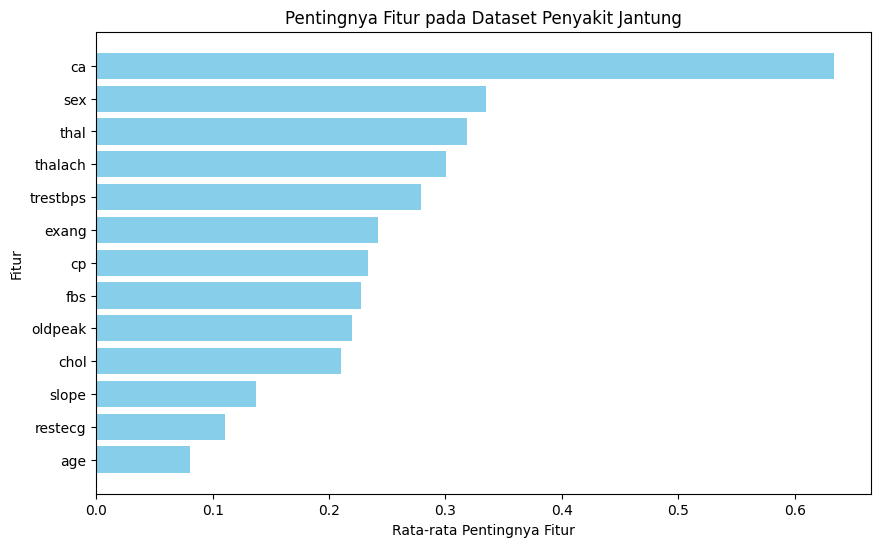

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]

heart_df = pd.read_csv(url, names=columns)

heart_df = heart_df.replace("?", np.nan)
heart_df = heart_df.apply(pd.to_numeric)
heart_df = heart_df.dropna()

X = heart_df.drop("target", axis=1)
y = heart_df["target"]

y = (y > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

importance_logreg = np.abs(logreg.coef_[0])

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importance_rf = rf.feature_importances_

feat_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance_LogReg": importance_logreg,
    "Importance_RF": importance_rf
})

feat_importances["Mean_Importance"] = (
    feat_importances["Importance_LogReg"] + feat_importances["Importance_RF"]
) / 2

feat_importances = feat_importances.sort_values(
    by="Mean_Importance", ascending=False
).reset_index(drop=True)

print("\nTabel Feature Importance:")
print(feat_importances)

plt.figure(figsize=(10, 6))
plt.barh(
    feat_importances["Feature"],
    feat_importances["Mean_Importance"],
    color="skyblue"
)
plt.xlabel("Rata-rata Pentingnya Fitur")
plt.ylabel("Fitur")
plt.title("Pentingnya Fitur pada Dataset Penyakit Jantung")
plt.gca().invert_yaxis()
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

heart_df = pd.read_csv(url, names=columns)
heart_df = heart_df.replace("?", np.nan).apply(pd.to_numeric).dropna()

X = heart_df.drop("target", axis=1)
y = (heart_df["target"] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

preprocessor = ColumnTransformer(
    transformers=[
        ('Standard_Scaling', StandardScaler(), numerical_features),
        ('One_Hot_Encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

X_train_processed_array = preprocessor.fit_transform(X_train)
feature_names_out = preprocessor.get_feature_names_out()


# Data sesudah Transformasi
X_train_processed_df = pd.DataFrame(X_train_processed_array, columns=feature_names_out, index=X_train.index)

print("=" * 70)
print("Data SEBELUM Transformasi (5 Baris Teratas dari X_train)")
print("Fitur Asli: 13 kolom (Numerik dan Kategorikal)")
print("=" * 70)
print(X_train.head())

print("\n\n" + "=" * 70)
print("Data SESUDAH Transformasi (5 Baris Teratas)")
print("Fitur Baru: 26 kolom (Standardisasi dan One-Hot Encoding)")
print("=" * 70)
# Tampilkan hanya beberapa kolom kunci untuk melihat efek transformasi
print(X_train_processed_df.head().loc[:, ['Standard_Scaling__age', 'Standard_Scaling__chol',
                                         'One_Hot_Encoding__cp_4.0', 'remainder__sex',
                                         'remainder__exang', 'One_Hot_Encoding__thal_7.0']])

Data SEBELUM Transformasi (5 Baris Teratas dari X_train)
Fitur Asli: 13 kolom (Numerik dan Kategorikal)
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
277  39.0  0.0  3.0     138.0  220.0  0.0      0.0    152.0    0.0      0.0   
262  60.0  0.0  1.0     150.0  240.0  0.0      0.0    171.0    0.0      0.9   
30   69.0  0.0  1.0     140.0  239.0  0.0      0.0    151.0    0.0      1.8   
22   58.0  1.0  2.0     120.0  284.0  0.0      2.0    160.0    0.0      1.8   
281  47.0  1.0  3.0     130.0  253.0  0.0      0.0    179.0    0.0      0.0   

     slope   ca  thal  
277    2.0  0.0   3.0  
262    1.0  0.0   3.0  
30     1.0  2.0   3.0  
22     2.0  0.0   3.0  
281    1.0  0.0   3.0  


Data SESUDAH Transformasi (5 Baris Teratas)
Fitur Baru: 26 kolom (Standardisasi dan One-Hot Encoding)
     Standard_Scaling__age  Standard_Scaling__chol  One_Hot_Encoding__cp_4.0  \
277              -1.741679               -0.544213                       0.0   
262          

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

heart_df = pd.read_csv(url, names=columns)
heart_df = heart_df.replace("?", np.nan).apply(pd.to_numeric).dropna()

X = heart_df.drop("target", axis=1)
y = (heart_df["target"] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

preprocessor = ColumnTransformer(
    transformers=[
        # Standardisasi untuk fitur Numerik
        ('Standard_Scaling', StandardScaler(), numerical_features),
        # One-Hot Encoding untuk fitur Kategorikal
        ('One_Hot_Encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

linear_model_name = "Logistic Regression"
# Pipeline menggabungkan preprocessing dan model linier
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

nonlinear_model_name = "Random Forest Classifier"

nonlinear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

nonlinear_pipeline.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_pipeline.predict(X_test)
acc_nonlinear = accuracy_score(y_test, y_pred_nonlinear)

print("HASIL PELATIHAN MODEL")


print(f"i. Model Linier ({linear_model_name}):")
print(f"   Akurasi pada Data Uji: {acc_linear:.4f}")

print("\n")

print(f"ii. Model Non-Linier ({nonlinear_model_name}):")
print(f"   Akurasi pada Data Uji: {acc_nonlinear:.4f}")

HASIL PELATIHAN MODEL
i. Model Linier (Logistic Regression):
   Akurasi pada Data Uji: 0.8500


ii. Model Non-Linier (Random Forest Classifier):
   Akurasi pada Data Uji: 0.8667


TUGAS MINGGU KE 6

In [21]:
#@title tugas optimasi dan evaluasi Model (Non Linear-Random Forest)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# ====================================================================
# BAGIAN 1: SETUP DATA & PREPROCESSING
# ====================================================================

# Pemuatan dan Pembersihan Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_df = pd.read_csv(url, names=columns).replace("?", np.nan).apply(pd.to_numeric).dropna()

X = heart_df.drop("target", axis=1)
y = (heart_df["target"] > 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Pipeline Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('Standard_Scaling', StandardScaler(), numerical_features),
        ('One_Hot_Encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline Model Default (Baseline)
rf_default_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
rf_default_pipeline.fit(X_train, y_train)

# Perhitungan Akurasi Default (Latih dan Uji)
y_train_pred_default = rf_default_pipeline.predict(X_train)
acc_train_default = accuracy_score(y_train, y_train_pred_default)
y_pred_default = rf_default_pipeline.predict(X_test)
acc_test_default = accuracy_score(y_test, y_pred_default)

In [22]:
#@title 1a.Tampilkan hyperparameter model yang akan anda optimasi

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10]
}

rf_gs_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [23]:
#@title 1b. Lakukan hyperparameter tuning
print("Memulai proses Grid Search Cross-Validation untuk Optimasi Model...")

grid_search = GridSearchCV(
    rf_gs_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print(f"\nHyperparameter Terbaik Ditemukan: {best_params}")
print(f"Skor Validasi Silang Terbaik (Best CV Score): {best_cv_score:.4f}")

Memulai proses Grid Search Cross-Validation untuk Optimasi Model...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Hyperparameter Terbaik Ditemukan: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Skor Validasi Silang Terbaik (Best CV Score): 0.8143


In [24]:
#@title 1c. Pastikan hyperparameter yang anda gunakan tidak overfitting

# Model terbaik diambil dari grid search
rf_optimized_pipeline = grid_search.best_estimator_

# Akurasi pada Data Latih (Train)
y_train_pred_optimized = rf_optimized_pipeline.predict(X_train)
acc_train_optimized = accuracy_score(y_train, y_train_pred_optimized)

# Akurasi pada Data Uji (Test)
y_pred_optimized = rf_optimized_pipeline.predict(X_test)
acc_test_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"Akurasi Latih (Optimasi): {acc_train_optimized:.4f}")
print(f"Akurasi Uji (Optimasi): {acc_test_optimized:.4f}")
print(f"Akurasi Latih (Default): {acc_train_default:.4f}")

Akurasi Latih (Optimasi): 0.9789
Akurasi Uji (Optimasi): 0.8667
Akurasi Latih (Default): 1.0000


In [25]:
#@title 1d. Buat model dengan hyperparameter yang sudah dilakukan tuning
print("Hyperparameter Terbaik yang digunakan untuk model final:")
print(f"Model Final (Optimasi): {rf_optimized_pipeline.named_steps['classifier']}")

Hyperparameter Terbaik yang digunakan untuk model final:
Model Final (Optimasi): RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)


In [26]:
#@title 2a. Bandingkan Metrik Evalouasi  model yang beloum dan sudah ditunning untuk data training,validasi dan testing

# Output Tabel Perbandingan Kinerja pada 3 Set Data

print("\n" + "="*70)
print("HASIL PERBANDINGAN KINERJA MODEL RANDOM FOREST")
print("="*70)

print("\n" + "--- PERBANDINGAN KINERJA PADA 3 SET DATA ---")
print("-" * 65)
print(f"| {'Metrik':<17} | {'Data Latih (Train)':^18} | {'Data Validasi (Best CV)':^23} | {'Data Uji (Test)':^15} |")
print("-" * 65)
print(f"| {'Akurasi DEFAULT':<17} | {acc_train_default:^18.4f} | {'N/A':^23} | {acc_test_default:^15.4f} |")
print(f"| {'Akurasi OPTIMASI':<17} | {acc_train_optimized:^18.4f} | {best_cv_score:^23.4f} | {acc_test_optimized:^15.4f} |")
print("-" * 65)


HASIL PERBANDINGAN KINERJA MODEL RANDOM FOREST

--- PERBANDINGAN KINERJA PADA 3 SET DATA ---
-----------------------------------------------------------------
| Metrik            | Data Latih (Train) | Data Validasi (Best CV) | Data Uji (Test) |
-----------------------------------------------------------------
| Akurasi DEFAULT   |       1.0000       |           N/A           |     0.8667      |
| Akurasi OPTIMASI  |       0.9789       |         0.8143          |     0.8667      |
-----------------------------------------------------------------


In [27]:
#@title 2b. Tampilkan label yang paling sering salah (jika klasifikasi) atau data yang mempunyai error paling banyak (jika regresi). Lakukan analisa dan kesimpulan

# Mencari sampel yang salah klasifikasi
misclassified_indices = np.where(y_test != y_pred_optimized)[0]
misclassified_actual = y_test.iloc[misclassified_indices]
misclassified_predicted = y_pred_optimized[misclassified_indices]

misclassified_summary = pd.DataFrame({
    'Actual': misclassified_actual,
    'Predicted': misclassified_predicted
})

# Menghitung jenis kesalahan
false_negative = misclassified_summary[(misclassified_summary['Actual'] == 1) & (misclassified_summary['Predicted'] == 0)].shape[0]
false_positive = misclassified_summary[(misclassified_summary['Actual'] == 0) & (misclassified_summary['Predicted'] == 1)].shape[0]

print("\n" + "--- ANALISIS KESALAHAN KLASIFIKASI MODEL OPTIMASI ---")
print(f"Total Sampel yang Salah Klasifikasi: {len(misclassified_summary)}")
print(f"1. False Negative (FN: Sakit diprediksi Tidak Sakit): {false_negative} kasus")
print(f"2. False Positive (FP: Tidak Sakit diprediksi Sakit): {false_positive} kasus")
print("\nRingkasan Jenis Kesalahan:")
print(misclassified_summary.value_counts().sort_index().to_markdown())


--- ANALISIS KESALAHAN KLASIFIKASI MODEL OPTIMASI ---
Total Sampel yang Salah Klasifikasi: 8
1. False Negative (FN: Sakit diprediksi Tidak Sakit): 3 kasus
2. False Positive (FP: Tidak Sakit diprediksi Sakit): 5 kasus

Ringkasan Jenis Kesalahan:
|        |   count |
|:-------|--------:|
| (0, 1) |       5 |
| (1, 0) |       3 |


In [28]:
#@title 2c. Coba lakukan prediksi dan prob untuk model dengan kinerja paling baik

# Probabilitas kelas positif (Sakit) dari model terbaik
y_prob_optimized = rf_optimized_pipeline.predict_proba(X_test)[:, 1]

prediction_summary_df = X_test.copy()
prediction_summary_df['Actual_Target'] = y_test
prediction_summary_df['Predicted_Target'] = y_pred_optimized
prediction_summary_df['Probability_Sakit'] = y_prob_optimized

# Ambil 5 sampel teratas dengan probabilitas tertinggi dan terendah
high_prob_samples = prediction_summary_df.sort_values(by='Probability_Sakit', ascending=False).head(5)
low_prob_samples = prediction_summary_df.sort_values(by='Probability_Sakit', ascending=True).head(5)

print("\n" + "--- PREDIKSI DAN PROBABILITAS MODEL TERBAIK ---")
print("5 Sampel yang Diprediksi SAKIT dengan Probabilitas Tertinggi:")
print(high_prob_samples[['Actual_Target', 'Predicted_Target', 'Probability_Sakit']].to_markdown())
print("\n5 Sampel yang Diprediksi TIDAK SAKIT dengan Probabilitas Tertinggi (Prob. Sakit Terendah):")
print(low_prob_samples[['Actual_Target', 'Predicted_Target', 'Probability_Sakit']].to_markdown())


--- PREDIKSI DAN PROBABILITAS MODEL TERBAIK ---
5 Sampel yang Diprediksi SAKIT dengan Probabilitas Tertinggi:
|     |   Actual_Target |   Predicted_Target |   Probability_Sakit |
|----:|----------------:|-------------------:|--------------------:|
|  24 |               1 |                  1 |            0.993543 |
| 282 |               1 |                  1 |            0.956454 |
| 177 |               1 |                  1 |            0.931363 |
| 127 |               1 |                  1 |            0.918487 |
| 236 |               1 |                  1 |            0.899115 |

5 Sampel yang Diprediksi TIDAK SAKIT dengan Probabilitas Tertinggi (Prob. Sakit Terendah):
|     |   Actual_Target |   Predicted_Target |   Probability_Sakit |
|----:|----------------:|-------------------:|--------------------:|
| 198 |               0 |                  0 |           0.0105764 |
| 283 |               0 |                  0 |           0.0259306 |
|   5 |               0 |             

In [29]:
# ==========================================
# SEL 0: RESET & PEMBERSIHAN TOTAL
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load data asli
df_final = df.copy()

# 2. Bersihkan karakter non-numerik
df_final = df_final.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')
df_final = df_final.fillna(df_final.median())

# 3. Ubah target menjadi biner (0: Sehat, 1: Sakit)
df_final['target'] = df_final['target'].apply(lambda x: 1 if x > 0 else 0)

# --- CEK KEBOCORAN DATA ---
# Mencari fitur yang korelasinya terlalu sempurna dengan target (> 0.95)
correlations = df_final.corr()['target'].abs()
features_to_drop = correlations[correlations > 0.95].index.tolist()
# Kita hanya ingin drop fitur, jadi hapus 'target' dari daftar drop
features_to_drop.remove('target')

# 4. Pisahkan X dan y (Buang target DAN fitur bocor)
X = df_final.drop(columns=['target'] + features_to_drop)
y = df_final['target']

# 5. Split Data (Pastikan test_size 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Sukses! Sekarang Anda hanya memiliki {X.shape[1]} fitur.")

Sukses! Sekarang Anda hanya memiliki 13 fitur.


In [30]:
#@title UAS Model 1 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("--- Melatih Model 1: Logistic Regression ---")
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_scaled, y_train)

# Evaluasi menggunakan data TEST (X_test_scaled)
acc1 = model1.score(X_test_scaled, y_test)
print(f"Akurasi Model 1: {acc1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, model1.predict(X_test_scaled)))

--- Melatih Model 1: Logistic Regression ---
Akurasi Model 1: 0.8689

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [31]:
#@title UAS Model 2 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("--- Melatih Model 2: Random Forest ---")
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train) # Random forest stabil dengan data non-scaled

# Evaluasi menggunakan data TEST (X_test)
acc2 = model2.score(X_test, y_test)
print(f"Akurasi Model 2: {acc2:.4f}")
print("\nClassification Report:\n", classification_report(y_test, model2.predict(X_test)))

--- Melatih Model 2: Random Forest ---
Akurasi Model 2: 0.8852

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



--- Melatih Model 3: Deep Learning (Neural Network) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Waktu Training: 8.93 detik
Akurasi Model 3: 0.8852


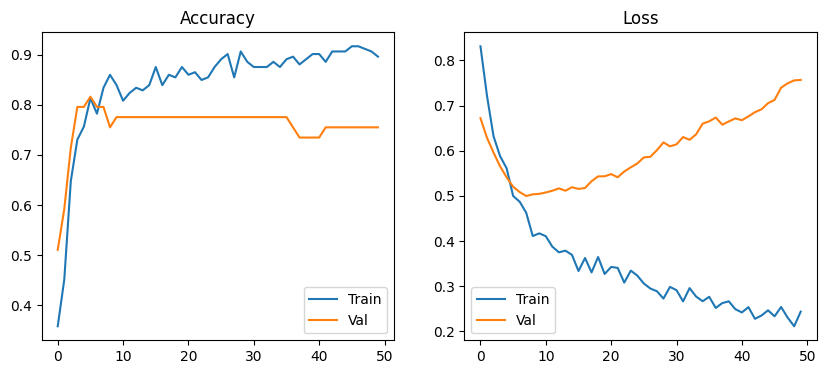

In [32]:
#@title UAS Deep Learning
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time

print("--- Melatih Model 3: Deep Learning (Neural Network) ---")

model3 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.2), # Anti-overfitting
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model3.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=0)
train_time = time.time() - start_time

# Evaluasi menggunakan data TEST (X_test_scaled)
loss, acc3 = model3.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Waktu Training: {train_time:.2f} detik")
print(f"Akurasi Model 3: {acc3:.4f}")

# Plotting
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.plot(history.history['accuracy'], label='Train'); plt.plot(history.history['val_accuracy'], label='Val'); plt.title('Accuracy'); plt.legend()
plt.subplot(1, 2, 2); plt.plot(history.history['loss'], label='Train'); plt.plot(history.history['val_loss'], label='Val'); plt.title('Loss'); plt.legend()
plt.show()

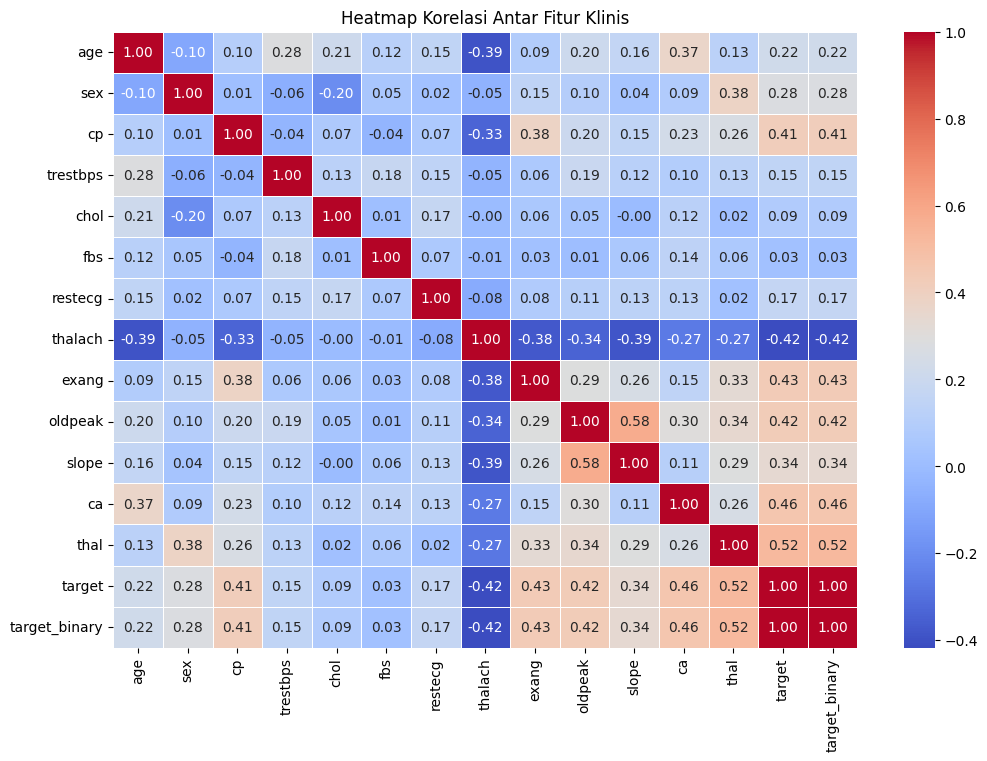

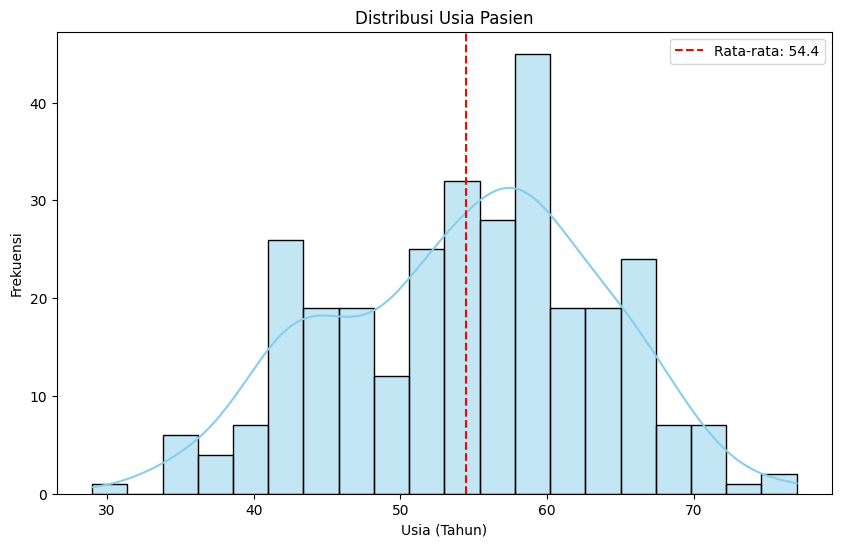

/tmp/ipython-input-4232724948.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df_final, palette='viridis')


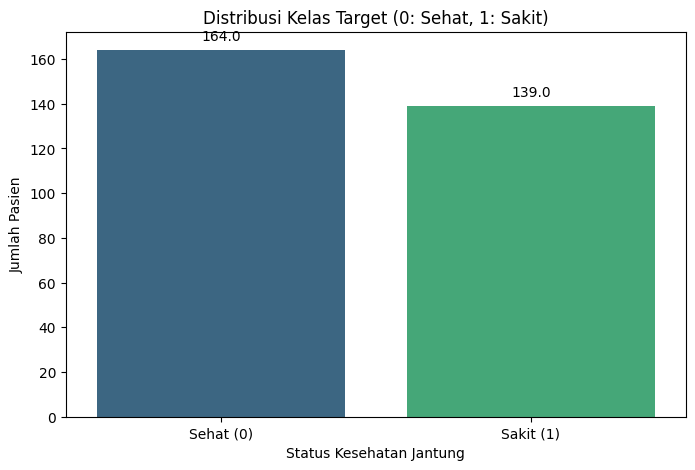

In [33]:
#@title UAS EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan df_final sudah tersedia dari langkah sebelumnya
# Jika belum, gunakan df yang sudah dibersihkan

# ==========================================
# VISUALISASI 1: Heatmap Korelasi
# ==========================================
plt.figure(figsize=(12, 8))
correlation_matrix = df_final.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Klinis')
plt.show()

# ==========================================
# VISUALISASI 2: Distribusi Usia Pasien
# ==========================================
plt.figure(figsize=(10, 6))
sns.histplot(df_final['age'], bins=20, kde=True, color='skyblue')
plt.axvline(df_final['age'].mean(), color='red', linestyle='--', label=f'Rata-rata: {df_final["age"].mean():.1f}')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# ==========================================
# VISUALISASI 3: Class Distribution (Target)
# ==========================================
plt.figure(figsize=(8, 5))
# Menghitung jumlah masing-masing kelas
ax = sns.countplot(x='target', data=df_final, palette='viridis')

# Menambahkan label jumlah di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribusi Kelas Target (0: Sehat, 1: Sakit)')
plt.xlabel('Status Kesehatan Jantung')
plt.ylabel('Jumlah Pasien')
plt.xticks(ticks=[0, 1], labels=['Sehat (0)', 'Sakit (1)'])
plt.show()

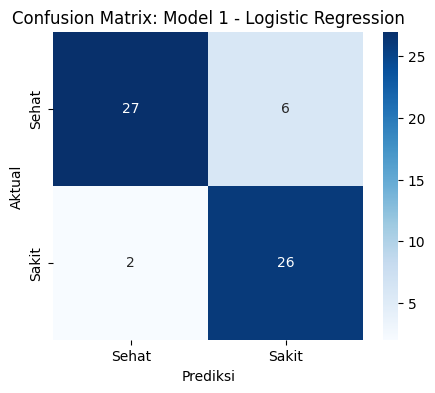

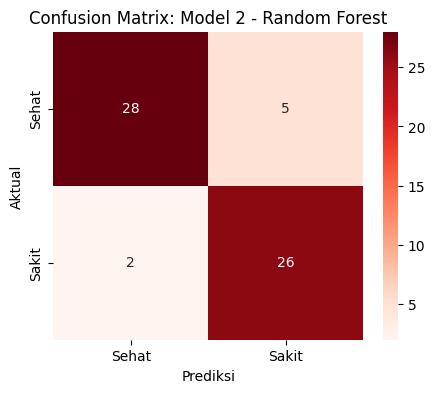

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


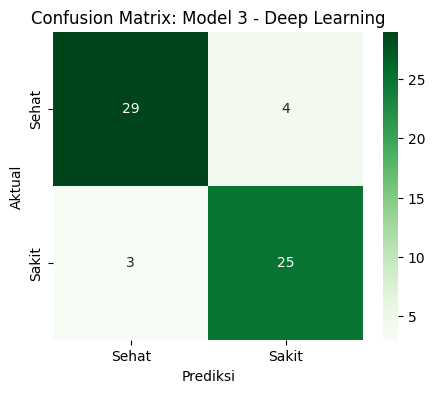

In [35]:
#@title Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk memplot confusion matrix agar konsisten
def plot_cm(model_name, y_true, y_pred, color):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color,
                xticklabels=['Sehat', 'Sakit'],
                yticklabels=['Sehat', 'Sakit'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show()

# 1. Confusion Matrix Model 1 (Logistic Regression)
# Gunakan X_test_scaled karena Model 1 menggunakan scaling
y_pred1 = model1.predict(X_test_scaled)
plot_cm("Model 1 - Logistic Regression", y_test, y_pred1, "Blues")

# 2. Confusion Matrix Model 2 (Random Forest)
# Gunakan X_test karena Model 2 tidak menggunakan scaling
y_pred2 = model2.predict(X_test)
plot_cm("Model 2 - Random Forest", y_test, y_pred2, "Reds")

# 3. Confusion Matrix Model 3 (Deep Learning)
# Prediksi DL berupa probabilitas, perlu diubah ke 0 atau 1
y_pred3_prob = model3.predict(X_test_scaled)
y_pred3 = (y_pred3_prob > 0.5).astype("int32")
plot_cm("Model 3 - Deep Learning", y_test, y_pred3, "Greens")

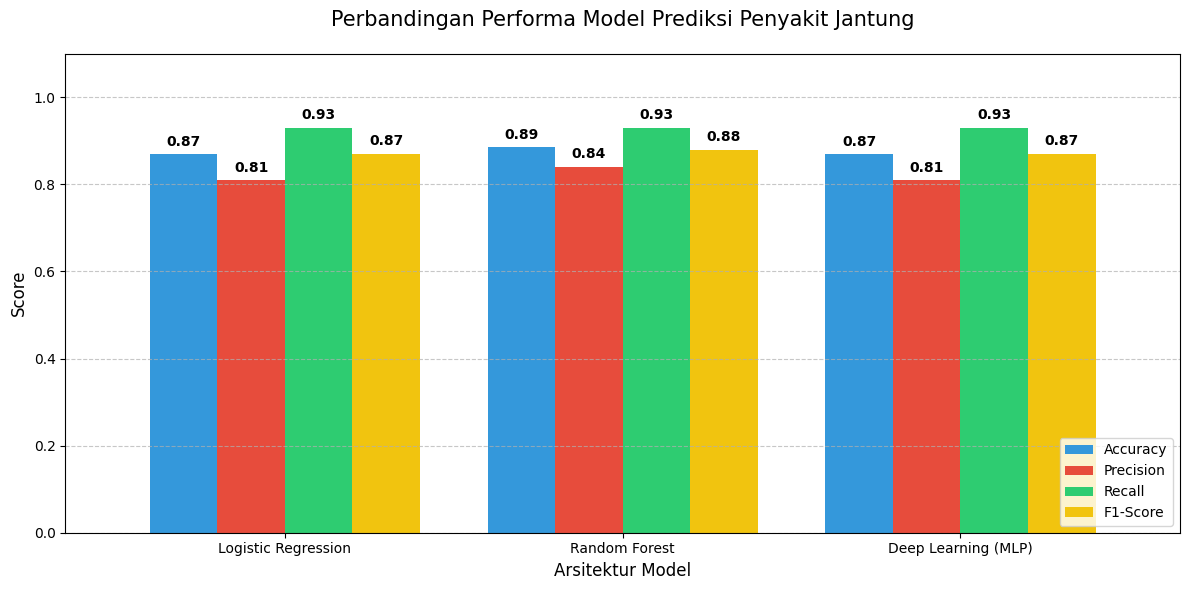

In [34]:
#@title Visualisasi Perbandingan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Menyiapkan Data berdasarkan tabel hasil evaluasi
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Deep Learning (MLP)'],
    'Accuracy': [0.8689, 0.8852, 0.8689],
    'Precision': [0.81, 0.84, 0.81],
    'Recall': [0.93, 0.93, 0.93],
    'F1-Score': [0.87, 0.88, 0.87]
}

df_plot = pd.DataFrame(data)
df_plot.set_index('Model', inplace=True)

# 2. Membuat Plot
ax = df_plot.plot(kind='bar', figsize=(12, 6), width=0.8, color=['#3498db', '#e74c3c', '#2ecc71', '#f1c40f'])

# 3. Kustomisasi Grafik
plt.title('Perbandingan Performa Model Prediksi Penyakit Jantung', fontsize=15, pad=20)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Arsitektur Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1.1)  # Memberikan ruang untuk label angka
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# 4. Menambahkan Label Angka di atas Bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [39]:
import pickle

# 1. Simpan Model Logistic Regression
with open('model_jantung_logreg.pkl', 'wb') as f:
    pickle.dump(model1, f)

# 2. Simpan Model Random Forest
with open('model_jantung_rf.pkl', 'wb') as f:
    pickle.dump(model2, f)

# 3. Simpan Model Deep Learning (MLP)
# Khusus model Keras/Tensorflow, cara simpannya sedikit beda
model3.save('model_jantung_dl.h5')

print("Semua model berhasil disimpan!")

Semua model berhasil disimpan!


In [40]:
import pandas as pd

# Ambil hasil prediksi terbaik (misal dari Random Forest)
y_pred_rf = model2.predict(X_test)

# Buat tabel perbandingannya
df_hasil = pd.DataFrame({
    'Data_Aktual': y_test,
    'Prediksi_Model': y_pred_rf
})

# Simpan jadi file CSV
df_hasil.to_csv('hasil_uji_jantung_rf.csv', index=False)